In [39]:
import numpy as np
import matplotlib.pyplot as plt

import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [40]:
# Input variable (x-axis)
ecg = ctrl.Antecedent(np.arange(-0.5, 2.5, 0.01), 'ecg')

age = ctrl.Antecedent(np.arange(0, 100, 1), 'age')

blood_pressure = ctrl.Antecedent(np.arange(100, 300, 1), 'blood_pressure')

blood_sugar = ctrl.Antecedent(np.arange(0, 160, 1), 'blood_sugar')

cholesterol = ctrl.Antecedent(np.arange(100, 400, 1), 'cholesterol')

maximum_heart_rate = ctrl.Antecedent(
    np.arange(0, 500, 1), 'maximum_heart_rate')

old_peak = ctrl.Antecedent(np.arange(0, 6, 0.01), 'old_peak')



sex = ctrl.Antecedent(np.arange(0, 2, 1), 'sex')

chest_pain = ctrl.Antecedent(np.arange(1, 5, 1), 'chest_pain')

exercise = ctrl.Antecedent(np.arange(0, 2, 1), 'exercise')

In [41]:
health = ctrl.Consequent(np.arange(0, 4, 0.01), 'health', defuzzify_method='centroid')

In [42]:
# Membership functions
ecg['normal'] = fuzz.trapmf(ecg.universe, [-0.5, -0.5, 0, 0.4])
ecg['abnormal'] = fuzz.trimf(ecg.universe, [0.2, 1, 1.8])
ecg['hypertrophy'] = fuzz.trapmf(ecg.universe, [1.4, 1.9, 2.5, 2.5])


age['young'] = fuzz.trapmf(age.universe, [0, 0, 29, 38])
age['mild'] = fuzz.trimf(age.universe, [33, 38, 45])
age['old'] = fuzz.trimf(age.universe, [40, 48, 58])
age['very_old'] = fuzz.trapmf(age.universe, [52, 60, 80, 80])


blood_pressure['low'] = fuzz.trapmf(blood_pressure.universe, [100, 100, 111, 134])
blood_pressure['medium'] = fuzz.trimf(blood_pressure.universe, [127, 139, 153])
blood_pressure['high'] = fuzz.trimf(blood_pressure.universe, [153, 157, 172])
blood_pressure['very_high'] = fuzz.trapmf(
    blood_pressure.universe, [154, 171, 300, 300])

blood_sugar['true'] = fuzz.trapmf(blood_sugar.universe, [105, 105, 120, 160])
blood_sugar['false'] = fuzz.trapmf(blood_sugar.universe, [0, 105, 120, 120])


cholesterol['low'] = fuzz.trapmf(cholesterol.universe, [100, 100, 151, 177])
cholesterol['medium'] = fuzz.trimf(cholesterol.universe, [188, 215, 250])
cholesterol['high'] = fuzz.trimf(cholesterol.universe, [217, 263, 307])
cholesterol['very_high'] = fuzz.trapmf(cholesterol.universe, [281, 347, 400, 400])


maximum_heart_rate['low'] = fuzz.trapmf(
    maximum_heart_rate.universe, [0, 0, 100, 141])
maximum_heart_rate['medium'] = fuzz.trimf(
    maximum_heart_rate.universe, [111, 152, 194])
maximum_heart_rate['high'] = fuzz.trapmf(
    maximum_heart_rate.universe, [152, 210, 500, 500])

old_peak['low'] = fuzz.trapmf(old_peak.universe, [0, 0, 1, 2])
old_peak['risk'] = fuzz.trimf(old_peak.universe, [1.5, 2.8, 4.2])
old_peak['terrible'] = fuzz.trapmf(old_peak.universe, [2.5, 4, 6, 6])




sex['male'] = fuzz.trimf(sex.universe, [0, 0, 0])
sex['female'] = fuzz.trimf(sex.universe, [1, 1, 1])

chest_pain['typical_anginal'] = fuzz.trimf(chest_pain.universe, [1, 1, 1])
chest_pain['atypical_anginal'] = fuzz.trimf(chest_pain.universe, [2, 2, 2])
chest_pain['non_anginal_pain'] = fuzz.trimf(chest_pain.universe, [3, 3, 3])
chest_pain['asymptomatic'] = fuzz.trimf(chest_pain.universe, [4, 4, 4])

exercise['true'] = fuzz.trimf(exercise.universe, [0, 0, 0])
exercise['false'] = fuzz.trimf(exercise.universe, [1, 1, 1])

In [43]:

health['healthy'] = fuzz.trapmf(health.universe, [0, 0, 0.25, 1])
health['sick_1'] = fuzz.trimf(health.universe, [0, 1, 2])
health['sick_2'] = fuzz.trimf(health.universe, [1, 2, 3])
health['sick_3'] = fuzz.trimf(health.universe, [2, 3, 4])
health['sick_4'] = fuzz.trapmf(health.universe, [3, 3.75, 4, 4])

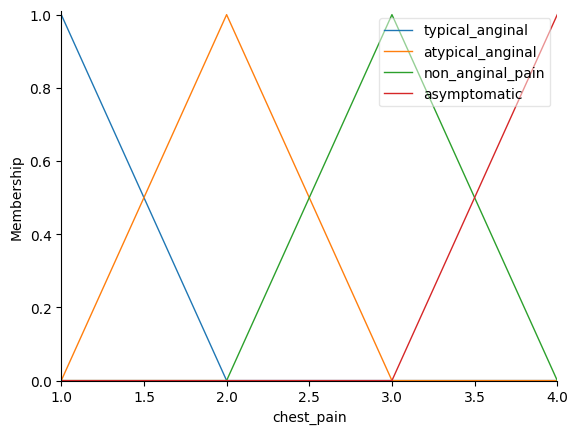

In [44]:
chest_pain.view()

In [45]:
# RULE 1: IF (age IS very_old) AND (chest_pain IS atypical_anginal) THEN health IS sick_4;

rule1 = ctrl.Rule(
    antecedent=(
        age['very_old'] &
        chest_pain['atypical_anginal']
    ),
    consequent=(
        health['sick_4']
    ), label='rule1'
)

# Rule 2
rule2 = ctrl.Rule(
    antecedent=(
        (maximum_heart_rate['high'] & age['old'])
    ),
    consequent=health['sick_4'],
    label='rule2'
)

# Rule 3
rule3 = ctrl.Rule(
    antecedent=(
        (sex['male'] & maximum_heart_rate['medium'])
    ),
    consequent=health['sick_3'],
    label='rule3'
)

# Rule 4
rule4 = ctrl.Rule(
    antecedent=(
        (sex['female'] & maximum_heart_rate['medium'])
    ),
    consequent=health['sick_2'],
    label='rule4'
)

# Rule 5
rule5 = ctrl.Rule(
    antecedent=(
        (chest_pain['non_anginal_pain'] & blood_pressure['high'])
    ),
    consequent=health['sick_3'],
    label='rule5'
)

# Rule 6
rule6 = ctrl.Rule(
    antecedent=(
        (chest_pain['typical_anginal'] & maximum_heart_rate['medium'])
    ),
    consequent=health['sick_2'],
    label='rule6'
)

# Rule 7
rule7 = ctrl.Rule(
    antecedent=(
        (blood_sugar['true'] & age['mild'])
    ),
    consequent=health['sick_3'],
    label='rule7'
)

# Rule 8
rule8 = ctrl.Rule(
    antecedent=(
        (blood_sugar['false'] & blood_pressure['very_high'])
    ),
    consequent=health['sick_2'],
    label='rule8'
)

# Rule 9
rule9 = ctrl.Rule(
    antecedent=(
        (chest_pain['asymptomatic'] | age['very_old'])
    ),
    consequent=health['sick_1'],
    label='rule9'
)

# Rule 10
rule10 = ctrl.Rule(
    antecedent=(
        (blood_pressure['high'] | maximum_heart_rate['low'])
    ),
    consequent=health['sick_1'],
    label='rule10'
)

# Rule 11
rule11 = ctrl.Rule(
    antecedent=(
        (chest_pain['typical_anginal'])
    ),
    consequent=health['healthy'],
    label='rule11'
)

# Rule 12
rule12 = ctrl.Rule(
    antecedent=(
        (chest_pain['atypical_anginal'])
    ),
    consequent=health['sick_1'],
    label='rule12'
)

# Rule 13
rule13 = ctrl.Rule(
    antecedent=(
        (chest_pain['non_anginal_pain'])
    ),
    consequent=health['sick_2'],
    label='rule13'
)

# Rule 14
rule14 = ctrl.Rule(
    antecedent=(
        (chest_pain['asymptomatic'])
    ),
    consequent=health['sick_3'],
    label='rule14'
)

# Rule 15
rule15 = ctrl.Rule(
    antecedent=(
        (chest_pain['asymptomatic'])
    ),
    consequent=health['sick_4'],
    label='rule15'
)


# Rule 16
rule16 = ctrl.Rule(
    antecedent=(
        (sex['female'])
    ),
    consequent=health['sick_1'],
    label='rule16'
)

# Rule 17
rule17 = ctrl.Rule(
    antecedent=(
        (sex['male'])
    ),
    consequent=health['sick_2'],
    label='rule17'
)

# Rule 18
rule18 = ctrl.Rule(
    antecedent=(
        (blood_pressure['low'])
    ),
    consequent=health['healthy'],
    label='rule18'
)

# Rule 19
rule19 = ctrl.Rule(
    antecedent=(
        (blood_pressure['medium'])
    ),
    consequent=health['sick_1'],
    label='rule19'
)

# Rule 20
rule20 = ctrl.Rule(
    antecedent=(
        (blood_pressure['high'])
    ),
    consequent=health['sick_2'],
    label='rule20'
)

# Rule 21
rule21 = ctrl.Rule(
    antecedent=(
        (blood_pressure['high'])
    ),
    consequent=health['sick_3'],
    label='rule21'
)

# Rule 22
rule22 = ctrl.Rule(
    antecedent=(
        (blood_pressure['very_high'])
    ),
    consequent=health['sick_4'],
    label='rule22'
)

# Rule 23
rule23 = ctrl.Rule(
    antecedent=(
        (cholesterol['low'])
    ),
    consequent=health['healthy'],
    label='rule23'
)

# Rule 24
rule24 = ctrl.Rule(
    antecedent=(
        (cholesterol['medium'])
    ),
    consequent=health['sick_1'],
    label='rule24'
)

# Rule 25
rule25 = ctrl.Rule(
    antecedent=(
        (cholesterol['high'])
    ),
    consequent=health['sick_2'],
    label='rule25'
)

# Rule 26
rule26 = ctrl.Rule(
    antecedent=(
        (cholesterol['high'])
    ),
    consequent=health['sick_3'],
    label='rule26'
)


# Rule 27
rule27 = ctrl.Rule(
    antecedent=(
        (cholesterol['very_high'])
    ),
    consequent=health['sick_4'],
    label='rule27'
)

# Rule 28
rule28 = ctrl.Rule(
    antecedent=(
        (blood_sugar['true'])
    ),
    consequent=health['sick_2'],
    label='rule28'
)

# Rule 29
rule29 = ctrl.Rule(
    antecedent=(
        (ecg['normal'])
    ),
    consequent=health['healthy'],
    label='rule29'
)

# Rule 30
rule30 = ctrl.Rule(
    antecedent=(
        (ecg['normal'])
    ),
    consequent=health['sick_1'],
    label='rule30'
)

# Rule 31
rule31 = ctrl.Rule(
    antecedent=(
        (ecg['abnormal'])
    ),
    consequent=health['sick_2'],
    label='rule31'
)

# Rule 32
rule32 = ctrl.Rule(
    antecedent=(
        (ecg['hypertrophy'])
    ),
    consequent=health['sick_3'],
    label='rule32'
)

# Rule 33
rule33 = ctrl.Rule(
    antecedent=(
        (ecg['hypertrophy'])
    ),
    consequent=health['sick_4'],
    label='rule33'
)

# Rule 34
rule34 = ctrl.Rule(
    antecedent=(
        (maximum_heart_rate['low'])
    ),
    consequent=health['healthy'],
    label='rule34'
)

# Rule 35
rule35 = ctrl.Rule(
    antecedent=(
        (maximum_heart_rate['medium'])
    ),
    consequent=health['sick_1'],
    label='rule35'
)

# Rule 36
rule36 = ctrl.Rule(
    antecedent=(
        (maximum_heart_rate['medium'])
    ),
    consequent=health['sick_2'],
    label='rule36'
)

# Rule 37
rule37 = ctrl.Rule(
    antecedent=(
        (maximum_heart_rate['high'])
    ),
    consequent=health['sick_3'],
    label='rule37'
)

# Rule 38
rule38 = ctrl.Rule(
    antecedent=(
        (maximum_heart_rate['high'])
    ),
    consequent=health['sick_4'],
    label='rule38'
)

# Rule 39
rule39 = ctrl.Rule(
    antecedent=(
        (exercise['true'])
    ),
    consequent=health['sick_2'],
    label='rule39'
)

# Rule 40
rule40 = ctrl.Rule(
    antecedent=(
        (old_peak['low'])
    ),
    consequent=health['healthy'],
    label='rule40'
)

# Rule 41
rule41 = ctrl.Rule(
    antecedent=(
        (old_peak['low'])
    ),
    consequent=health['sick_1'],
    label='rule41'
)

# Rule 42
rule42 = ctrl.Rule(
    antecedent=(
        (old_peak['terrible'])
    ),
    consequent=health['sick_2'],
    label='rule42'
)

# Rule 43
rule43 = ctrl.Rule(
    antecedent=(
        (old_peak['terrible'])
    ),
    consequent=health['sick_3'],
    label='rule43'
)

# Rule 44
rule44 = ctrl.Rule(
    antecedent=(
        (old_peak['risk'])
    ),
    consequent=health['sick_4'],
    label='rule44'
)

# # Rule 45
# rule45 = ctrl.Rule(
#     antecedent=(
#         (thallium['normal'])
#     ),
#     consequent=health['healthy'],
#     label='rule45'
# )

# # Rule 46
# rule46 = ctrl.Rule(
#     antecedent=(
#         (thallium['normal'])
#     ),
#     consequent=health['sick_1'],
#     label='rule46'
# )

# # Rule 47
# rule47 = ctrl.Rule(
#     antecedent=(
#         (thallium['medium'])
#     ),
#     consequent=health['sick_2'],
#     label='rule47'
# )

# # Rule 48
# rule48 = ctrl.Rule(
#     antecedent=(
#         (thallium['high'])
#     ),
#     consequent=health['sick_3'],
#     label='rule48'
# )

# # Rule 49
# rule49 = ctrl.Rule(
#     antecedent=(
#         (thallium['high'])
#     ),
#     consequent=health['sick_4'],
#     label='rule49'
# )

# Rule 50
rule50 = ctrl.Rule(
    antecedent=(
        (age['young'])
    ),
    consequent=health['healthy'],
    label='rule50'
)

# Rule 51
rule51 = ctrl.Rule(
    antecedent=(
        (age['mild'])
    ),
    consequent=health['sick_1'],
    label='rule51'
)

# Rule 52
rule52 = ctrl.Rule(
    antecedent=(
        (age['old'])
    ),
    consequent=health['sick_2'],
    label='rule52'
)

# Rule 53
rule53 = ctrl.Rule(
    antecedent=(
        (age['old'])
    ),
    consequent=health['sick_3'],
    label='rule53'
)

# Rule 54
rule54 = ctrl.Rule(
    antecedent=(
        (age['very_old'])
    ),
    consequent=health['sick_4'],
    label='rule54'
)




c:\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


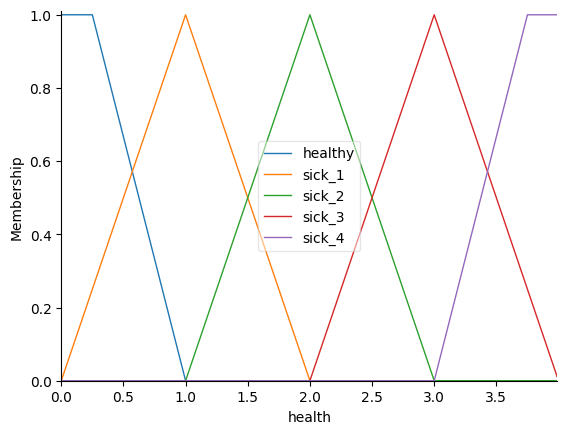

In [54]:
health.view()

In [58]:
# health['healthy'] = fuzz.trapmf(health.universe, [0, 0, 0.25, 1])
# health['sick_1'] = fuzz.trimf(health.universe, [0, 1, 2])
# health['sick_2'] = fuzz.trimf(health.universe, [1, 2, 3])
# health['sick_3'] = fuzz.trimf(health.universe, [2, 3, 4])
# health['sick_4'] = fuzz.trapmf(health.universe, [3, 3.75, 4, 4])

def get_health_risk(num):
    if num>=0 and num <= 0.5:
        return 'healthy'
    elif num > 0.5 and num<= 1.5:
        return "risk1"
    elif num > 1.5 and num <= 2.5:
        return "risk2"
    elif num > 2.5 and num <= 3.5:
        return "risk3"
    elif num > 3.5 and num <= 4.5:
        return "risk4"

In [59]:
all_rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
             rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20,
             rule21, rule22, rule23, rule24, rule25, rule26, rule27, rule28, rule29, rule30,
             rule31, rule32, rule33, rule34, rule35, rule36, rule37, rule38, rule39, rule40,
             rule41, rule42, rule43, rule44, 
            #  rule45, rule46, rule47, rule48, rule49, 
             rule50, rule51, rule52, rule53, rule54]


fuzzy_system = ctrl.ControlSystem(all_rules)

sim = ctrl.ControlSystemSimulation(fuzzy_system)


# # Input variable (x-axis)
# ecg = ctrl.Antecedent(np.arange(-0.5, 2.5, 0.01), 'ecg')

# age = ctrl.Antecedent(np.arange(0, 100, 1), 'age')

# blood_pressure = ctrl.Antecedent(np.arange(100, 300, 1), 'blood_pressure')

# blood_sugar = ctrl.Antecedent(np.arange(0, 160, 1), 'blood_sugar')

# cholesterol = ctrl.Antecedent(np.arange(100, 400, 1), 'cholesterol')

# maximum_heart_rate = ctrl.Antecedent(
#     np.arange(0, 500, 1), 'maximum_heart_rate')

# old_peak = ctrl.Antecedent(np.arange(0, 6, 0.01), 'old_peak')


# sex = ctrl.Antecedent(np.arange(0, 2, 1), 'sex')

# chest_pain = ctrl.Antecedent(np.arange(1, 5, 1), 'chest_pain')

# exercise = ctrl.Antecedent(np.arange(0, 2, 1), 'exercise')

sim.input['age'] = 75
sim.input['ecg'] = 1
sim.input['blood_pressure'] = 120
sim.input['blood_sugar'] = 100
sim.input['cholesterol'] = 120
sim.input['maximum_heart_rate'] = 200
sim.input['old_peak'] = 5
sim.input['chest_pain'] = 4
sim.input['exercise'] = 1
sim.input['sex'] = 1

sim.compute()

print('this the value')
val = sim.output['health']

print(get_health_risk(val))



this the value
risk2


In [ ]:
import json

import os

In [76]:




directory_path = "C:\\Users\\hp\\OneDrive\\Desktop\\FYP\\framework\\users\\"

for filename in os.listdir(directory_path):
    if filename.endswith(('.json')):
        # Process the file (e.g., read, write, analyze, etc.)
        print(f"Processing file: {filename}")
        with open(directory_path+filename, 'r') as file:
            data = json.load(file)

            print(data)

            sim.input['age'] = data["age"]
            sim.input['ecg'] = data["ecg"]
            sim.input['blood_pressure'] = data['blood_pressure']
            sim.input['blood_sugar'] = data['blood_sugar']
            sim.input['cholesterol'] = data["cholesterol"]
            sim.input['maximum_heart_rate'] = data["maximum_heart_rate"]
            sim.input['old_peak'] = data["old_peak"]
            sim.input['chest_pain'] = data["chest_pain"]
            sim.input['exercise'] = data["exercise"]
            sim.input['sex'] = data["sex"]

            sim.compute()


            val = sim.output['health']

            print(val, get_health_risk(val))

            




file.close()

Processing file: user1.json
{'age': 75, 'ecg': 1, 'blood_pressure': 120, 'blood_sugar': 100, 'cholesterol': 120, 'maximum_heart_rate': 200, 'old_peak': 5, 'chest_pain': 4, 'exercise': 1, 'sex': 1, 'patient_history': ['']}
1.9937038439689445 risk2
Processing file: user10.json
{'age': 75, 'ecg': 1, 'blood_pressure': 120, 'blood_sugar': 100, 'cholesterol': 120, 'maximum_heart_rate': 120, 'old_peak': 5, 'chest_pain': 4, 'exercise': 1, 'sex': 1, 'patient_history': ['']}
1.9937038439689445 risk2
Processing file: user2.json
{'age': 25, 'ecg': 1, 'blood_pressure': 120, 'blood_sugar': 100, 'cholesterol': 100, 'maximum_heart_rate': 80, 'old_peak': 1, 'chest_pain': 1, 'exercise': 0, 'sex': 0, 'patient_history': ['']}
1.2894741460457273 risk1
Processing file: user3.json
{'age': 40, 'ecg': 1, 'blood_pressure': 120, 'blood_sugar': 100, 'cholesterol': 120, 'maximum_heart_rate': 200, 'old_peak': 5, 'chest_pain': 4, 'exercise': 1, 'sex': 1, 'patient_history': ['']}
1.9937038439689445 risk2
Processing f